In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(0)

import pandas as pd
import numpy as np

/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_8033/4018492992.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [21]:
# SUGGESTED BVP:
# y'' = -2 , y(0) = y(1) = 1
"""
a = 0
b = 1
y_a = 1
y_b = 1

def ode_function(x, y):
    return -2

def analytical_solution(x):
    return 1 + (x * (1 - x))
"""

# ANOTHER BVP:
# y'' = 9 * y, y(0) = 0, y(1) = 6
a = 0
b = 1
y_a = 0
y_b = 6
def ode_function(x, y):
    return 9 * y

def analytical_solution(x):
    return (6 * np.exp(3 - 3 * x) * (-1 + np.exp(6 * x)))/ (-1 + np.exp(6))

# Define the ANN model
model = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10,10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10, 1)
)

In [26]:
# Training loop
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

for epoch in range(5000):
    optimizer.zero_grad()
    
    # Sample x within the domain
    x = torch.rand(100, 1) * (b - a) + a  # Assume a and b are defined
    x.requires_grad_(True)  # Enable gradient computation for x
    
    # Compute y and its derivatives
    y = model(x)
    y.requires_grad_(True)
    y_prime = torch.autograd.grad(y, x, torch.ones_like(y), create_graph=True)[0]
    y_double_prime = torch.autograd.grad(y_prime, x, torch.ones_like(y_prime), create_graph=True)[0]
    
    
    # Compute the loss
    loss_ode = torch.mean((y_double_prime - ode_function(x, y))**2)
    loss_bc = (model(torch.tensor([[a]], dtype=torch.float32)) - y_a)**2 + (model(torch.tensor([[b]], dtype=torch.float32)) - y_b)**2
    loss = loss_ode + loss_bc
    
    # Backpropagation
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.0007914148736745119
Epoch 100, Loss: 0.00032894135802052915
Epoch 200, Loss: 0.00025008420925587416
Epoch 300, Loss: 0.0002859703672584146
Epoch 400, Loss: 0.0003672336461022496
Epoch 500, Loss: 0.001901971292681992
Epoch 600, Loss: 0.0009599432232789695
Epoch 700, Loss: 0.0008958214311860502
Epoch 800, Loss: 0.0003258745127823204
Epoch 900, Loss: 0.0002778379712253809
Epoch 1000, Loss: 0.001684806076809764
Epoch 1100, Loss: 0.0006769975880160928
Epoch 1200, Loss: 0.00035591452615335584
Epoch 1300, Loss: 4.459813499124721e-05
Epoch 1400, Loss: 0.0007388033554889262
Epoch 1500, Loss: 9.30286551010795e-05
Epoch 1600, Loss: 0.00020945596043020487
Epoch 1700, Loss: 0.0026885876432061195
Epoch 1800, Loss: 0.0005091506754979491
Epoch 1900, Loss: 0.005479039158672094
Epoch 2000, Loss: 0.00014392263256013393
Epoch 2100, Loss: 0.0005945485318079591
Epoch 2200, Loss: 4.231052298564464e-05
Epoch 2300, Loss: 0.002198004862293601
Epoch 2400, Loss: 8.34526217659004e-05
Epoch 2500, L

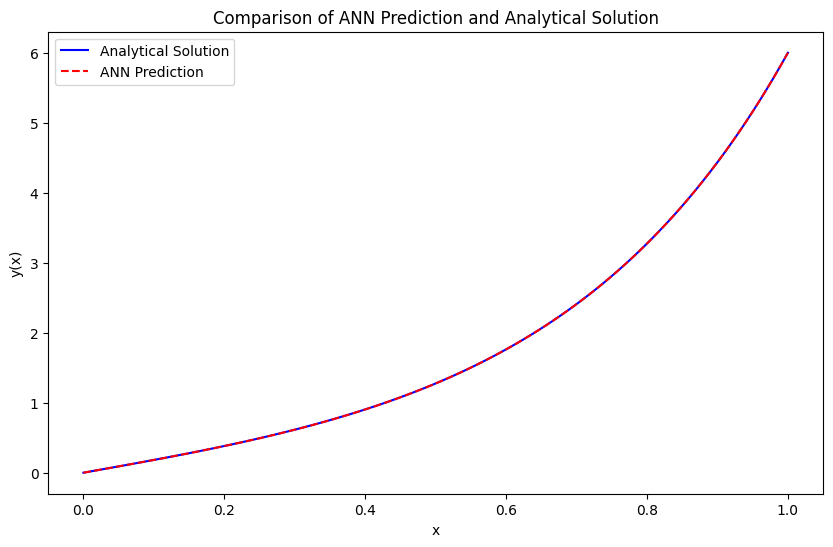

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Sampling x values
x_values = np.linspace(a, b, 100)
x_tensor = torch.tensor(x_values.reshape(-1, 1), dtype=torch.float32)

# Use the trained model for predictions (make sure it's already loaded and trained)
with torch.no_grad():  # No need for gradients here
    y_pred = model(x_tensor).numpy()

# Compute the analytical solution
y_true = analytical_solution(x_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_true, label='Analytical Solution', color='blue')
plt.plot(x_values, y_pred, label='ANN Prediction', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparison of ANN Prediction and Analytical Solution')
plt.legend()
plt.show()
